# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

In [ ]:
# This data represents the results of 17 marketing campaigns, from May 2008 to Nov 2010

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import time 

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, HalvingGridSearchCV, HalvingRandomSearchCV
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.linear_model import LogisticRegression, SGDRegressor, LinearRegression
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix

from sklearn.datasets import load_digits

df = pd.read_csv('data/bank-additional-full.csv', sep = ';').dropna()
#df.info()
#df.head()

### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [ ]:
# Check for empty vaules
# df.isnull().sum().sort_values().plot(kind = 'bar')
# plt.show();

# The data does not need to be cleaned up beyond the .dropna() command that was executed when I read the data
# from the source file

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

This dataset contains both demographic and economic information for people who were targeted by various marketing campaigns. The business objective is to determine whether patterns hidden in the demographic data can be used to target consumers who are more likely to respond positively to marketing campaigns. By noting the economic conditions at the time of the campaign, we will be able to separate the effect of external conditions on the outcomes of the campaigns.

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [2]:
categorical = ['age','job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
numerical = df.drop(columns=categorical).columns
numerical = numerical.drop(['y'])

#print(numerical)
#print(categorical)
#print(df[categorical])

In [3]:
# Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical),
        ('cat', OneHotEncoder(), categorical)
    ])

In [ ]:
sns.pairplot(df,hue='y')

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [4]:
X = df.drop('y', axis=1)
y = df['y']#.astype(int)

X_scaled = preprocessor.fit_transform(X)
#print( X_scaled[5] )

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state = 42)

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [ ]:
# Linear Regression

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [8]:
# see cell below

### Problem 9: Score the Model

What is the accuracy of your model?

In [5]:
start = time.time()

lgr = LogisticRegression(multi_class='multinomial').fit(X_train, y_train)
lgr_train_score = lgr.score(X_train,y_train)
lgr_test_score = lgr.score(X_test,y_test)

end = time.time()
lgr_elapsed_time = end - start

print(f'Training Accuracy Score: {lgr_train_score}')
print(f'Test Accuracy Score: {lgr_test_score}')
print(f'Training Time (s): {lgr_elapsed_time}')

Training Accuracy Score: 0.9121750671716681
Test Accuracy Score: 0.9119160920656502
Training Time (s): 0.7845139503479004


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

## k Nearest Neighbors

In [6]:
start1 = time.time()

knn_final = KNeighborsClassifier().fit(X_train, y_train)
knn_train_score = knn_final.score(X_train, y_train)
knn_test_score = knn_final.score(X_test,y_test)

end1 = time.time()
knn_elapsed_time = end1 - start1

print(f'Training Accuracy Score: {knn_train_score}')
print(f'Test Accuracy Score: {knn_test_score}')
print(f'Training Time (s): {knn_elapsed_time}')

Training Accuracy Score: 0.9283286394095368
Test Accuracy Score: 0.9024958725842478
Training Time (s): 73.4954686164856


## Decision Tree

In [7]:
start = time.time()

decTree_final = DecisionTreeClassifier().fit(X_train, y_train)
decTree_train_score = decTree_final.score(X_train, y_train)
decTree_test_score = decTree_final.score(X_test,y_test)

end = time.time()
decTree_elapsed_time = end - start

print(f'Training Accuracy Score: {decTree_train_score}')
print(f'Test Accuracy Score: {decTree_test_score}')
print(f'Training Time (s): {decTree_elapsed_time}')

Training Accuracy Score: 1.0
Test Accuracy Score: 0.8927843061085753
Training Time (s): 1.3296442031860352


## SVM Model

In [8]:
start2 = time.time()

svc_final = SVC().fit(X_train, y_train)
svc_train_score = svc_final.score(X_train, y_train)
svc_test_score = svc_final.score(X_test,y_test)

end2 = time.time()
svc_elapsed_time = end2 - start2

print(f'Training Accuracy Score: {svc_train_score}')
print(f'Test Accuracy Score: {svc_test_score}')
print(f'Training Time (s): {svc_elapsed_time}')

Training Accuracy Score: 0.9241202939367453
Test Accuracy Score: 0.9122074390599204
Training Time (s): 54.56608605384827


## Results

In [9]:
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'Decision Tree', 'SVM'],
    'Fit Time': [lgr_elapsed_time, knn_elapsed_time, decTree_elapsed_time, svc_elapsed_time],
    'Training Score': [lgr_train_score, knn_train_score, decTree_train_score, svc_train_score],
    'Test Score': [lgr_test_score, knn_test_score, decTree_test_score, svc_test_score]
})

print(results)

                 Model   Fit Time  Training Score  Test Score
0  Logistic Regression   0.784514        0.912175    0.911916
1                  KNN  73.495469        0.928329    0.902496
2        Decision Tree   1.329644        1.000000    0.892784
3                  SVM  54.566086        0.924120    0.912207


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

### Grid Searches for KNN, Decision Tree, and SVC

#### KNN Randomized Search

In [31]:
params = {'n_neighbors': list(range(1, 50, 2))}

start = time.time()
knn_grid = RandomizedSearchCV(KNeighborsClassifier(),params)
#knn_grid = GridSearchCV(KNeighborsClassifier(), param_grid=params)
knn_grid.fit(X_train, y_train)

end = time.time()
knn_randomized_search_elapsed_time = end - start

best_k = list(knn_grid.best_params_.values())[0]
best_acc = knn_grid.score(X_test, y_test)

df1 = pd.DataFrame(knn_grid.cv_results_)
index1 = np.argmax(df1['mean_test_score'])

knn_rand_max_test = df1['mean_test_score'][index1]
knn_rand_optimized_parameter = df1['params'][index1]

print(f'Compute time: {knn_randomized_search_elapsed_time}')
print(f'Parameters of Max Test Score: {df1['params'][index1]}')
print(f'Max Test Score: {df1['mean_test_score'][index1]}')

Compute time: 494.117830991745
Parameters of Max Test Score: {'n_neighbors': 33}
Max Test Score: 0.9066718950259736


#### KNN Grid Search

In [30]:
params = {'n_neighbors': list(range(1, 50, 2))}

start = time.time()
knn_grid = RandomizedSearchCV(KNeighborsClassifier(),params)
#knn_grid = GridSearchCV(KNeighborsClassifier(), param_grid=params)
knn_grid.fit(X_train, y_train)

end = time.time()
knn_grid_search_elapsed_time = end - start

best_k = list(knn_grid.best_params_.values())[0]
best_acc = knn_grid.score(X_test, y_test)

df2 = pd.DataFrame(knn_grid.cv_results_)
index2 = np.argmax(df2['mean_test_score'])

knn_grid_max_test = df2['mean_test_score'][index2]
knn_grid_optimized_parameter = df2['params'][index2]

print(f'Compute time: {knn_grid_search_elapsed_time}')
print(f'Parameters of Max Test Score: {df2['params'][index2]}')
print(f'Max Test Score: {df2['mean_test_score'][index2]}')

Compute time: 341.2646367549896
Parameters of Max Test Score: {'n_neighbors': 41}
Max Test Score: 0.906995592953105


#### KNN Score with Improved Parameters

In [11]:
start1 = time.time()
knn_final2 = KNeighborsClassifier(n_neighbors=41).fit(X_train, y_train)

knn_train_score2 = knn_final2.score(X_train, y_train)
knn_test_score2 = knn_final2.score(X_test,y_test)

end1 = time.time()
knn_elapsed_time2 = end1 - start1

print(f'Training Accuracy Score: {knn_train_score2}')
print(f'Test Accuracy Score: {knn_test_score2}')
print(f'Training Time (s): {knn_elapsed_time2}')

Training Accuracy Score: 0.9104593570942993
Test Accuracy Score: 0.9065747305040303
Training Time (s): 74.54188299179077


#### Decision Tree Randomized Search

In [22]:
tree_params = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}

start = time.time()
dtc_grid = RandomizedSearchCV(DecisionTreeClassifier(), tree_params)
dtc_grid.fit(X_train, y_train)

end = time.time()
dt_randomized_search_elapsed_time = end - start

best_criterion = dtc_grid.best_params_['criterion']
best_depth = dtc_grid.best_params_['max_depth']

print(f'Best Criterion Type: {best_criterion}')
print(f'Best Max Depth: {best_depth}')

df3 = pd.DataFrame(dtc_grid.cv_results_)
index3 = np.argmax(df3['mean_test_score'])

dt_rand_max_test = df3['mean_test_score'][index3]
dt_rand_optimized_parameter = df3['params'][index3]

print(f'Compute time: {dt_randomized_search_elapsed_time}')
print(f'Parameters of Max Test Score: {df3['params'][index3]}')
print(f'Max Test Score: {df3['mean_test_score'][index3]}')

Best Criterion Type: entropy
Best Max Depth: 7
Compute time: 19.699299097061157
Parameters of Max Test Score: {'max_depth': 7, 'criterion': 'entropy'}
Max Test Score: 0.9128874411501776


#### Decision Tree Grid Search

In [23]:
tree_params = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}

start = time.time()
dtc_grid = GridSearchCV(DecisionTreeClassifier(), param_grid=tree_params)
dtc_grid.fit(X_train, y_train)

end = time.time()
dt_grid_search_elapsed_time = end - start

best_criterion = dtc_grid.best_params_['criterion']
best_depth = dtc_grid.best_params_['max_depth']

print(f'Best Criterion Type: {best_criterion}')
print(f'Best Max Depth: {best_depth}')

df4 = pd.DataFrame(dtc_grid.cv_results_)
index4 = np.argmax(df4['mean_test_score'])

dt_grid_max_test = df4['mean_test_score'][index4]
dt_grid_optimized_parameter = df4['params'][index4]

print(f'Compute time: {dt_grid_search_elapsed_time}')
print(f'Parameters of Max Test Score: {df4['params'][index4]}')
print(f'Max Test Score: {df4['mean_test_score'][index4]}')

Best Criterion Type: gini
Best Max Depth: 5
Compute time: 78.20378565788269
Parameters of Max Test Score: {'criterion': 'gini', 'max_depth': 5}
Max Test Score: 0.9133729670841267


#### Decision Tree Score with Improved Parameters

In [24]:
start = time.time()

decTree_final2 = DecisionTreeClassifier(criterion='gini', max_depth=5).fit(X_train, y_train)
decTree_train_score2 = decTree_final2.score(X_train, y_train)
decTree_test_score2 = decTree_final2.score(X_test,y_test)

end = time.time()
decTree_elapsed_time2 = end - start

print(f'Training Accuracy Score: {decTree_train_score2}')
print(f'Test Accuracy Score: {decTree_test_score2}')
print(f'Training Time (s): {decTree_elapsed_time2}')

Training Accuracy Score: 0.9171927098507656
Test Accuracy Score: 0.9150237933378654
Training Time (s): 0.18151426315307617


#### SVM Randomized Search

In [25]:
svm_params = {'kernel': ['rbf', 'poly', 'linear', 'sigmoid'],
         'gamma': [0.1, 1.0, 10.0, 50.0, 100.0],}

start = time.time()
svm_randomized = RandomizedSearchCV(SVC(), svm_params)
svm_randomized.fit(X_train, y_train)

end = time.time()
svm_ramdomized_search_elapsed_time = end - start

best_kernel = svm_randomized.best_params_['kernel']
best_gamma = svm_randomized.best_params_['gamma']

print(f'Best Kernel Type: {best_kernel}')
print(f'Best Gamma: {best_gamma}')

df5 = pd.DataFrame(svm_randomized.cv_results_)
index5 = np.argmax(df5['mean_test_score'])

svm_rand_max_test = df5['mean_test_score'][index5]
svm_rand_optimized_parameter = df5['params'][index5]

print(f'Compute time: {svm_ramdomized_search_elapsed_time}')
print(f'Parameters of Max Test Score: {df5['params'][index5]}')
print(f'Max Test Score: {df5['mean_test_score'][index5]}')

Best Kernel Type: rbf
Best Gamma: 0.1
Compute time: 4307.996659994125
Parameters of Max Test Score: {'kernel': 'rbf', 'gamma': 0.1}
Max Test Score: 0.9106213460927794


#### SVM Grid Search

In [26]:
svm_params = {'kernel': ['rbf', 'poly', 'linear', 'sigmoid'],
         'gamma': [0.1, 1.0, 10.0, 50.0, 100.0],}

start = time.time()
svm_grid = GridSearchCV(SVC(), param_grid=svm_params)
svm_grid.fit(X_train, y_train)

end = time.time()
svm_grid_search_elapsed_time = end - start

best_kernel = svm_grid.best_params_['kernel']
best_gamma = svm_grid.best_params_['gamma']

print(f'Best Kernel Type: {best_kernel}')
print(f'Best Gamma: {best_gamma}')

df6 = pd.DataFrame(svm_grid.cv_results_)
index6 = np.argmax(df6['mean_test_score'])

svm_grid_max_test = df6['mean_test_score'][index6]
svm_grid_optimized_parameter = df6['params'][index6]

print(f'Compute time: {svm_grid_search_elapsed_time}')
print(f'Parameters of Max Test Score: {df6['params'][index6]}')
print(f'Max Test Score: {df6['mean_test_score'][index6]}')

Best Kernel Type: rbf
Best Gamma: 0.1
Compute time: 7628.245174646378
Parameters of Max Test Score: {'gamma': 0.1, 'kernel': 'rbf'}
Max Test Score: 0.9106213460927794


#### SVM Score with Improved Parameters

In [27]:
start2 = time.time()

svc_final2 = SVC(kernel='rbf',gamma=0.1).fit(X_train, y_train)
svc_train_score2 = svc_final2.score(X_train, y_train)
svc_test_score2 = svc_final2.score(X_test,y_test)

end2 = time.time()
svc_elapsed_time2 = end2 - start2

print(f'Training Accuracy Score: {svc_train_score2}')
print(f'Test Accuracy Score: {svc_test_score2}')
print(f'Training Time (s): {svc_elapsed_time2}')

Training Accuracy Score: 0.938137321549966
Test Accuracy Score: 0.9140526366902981
Training Time (s): 53.591612577438354


### Default vs Optimized Parameters Results

{'Model': ['KNN', 'Decision Tree', 'SVM'], 'Default Fit Time': [73.4954686164856, 1.3296442031860352, 54.56608605384827], 'Improved Fit Time': [74.54188299179077, 0.18151426315307617, 53.591612577438354], 'Time Delta': [1.0464143753051758, -1.148129940032959, -0.9744734764099121], 'Default Training Score': [0.9283286394095368, 1.0, 0.9241202939367453], 'Improved Training Score': [0.9104593570942993, 0.9171927098507656, 0.938137321549966], 'Training Score Delta': [-0.017869282315237545, -0.08280729014923438, 0.014017027613220656], 'Default Test Score': [0.9024958725842478, 0.8927843061085753, 0.9122074390599204], 'Improved Test Score': [0.9065747305040303, 0.9150237933378654, 0.9140526366902981], 'Test Score Delta': [0.004078857919782464, 0.022239487229290145, 0.0018451976303777151]}
               Default Fit Time  Improved Fit Time  Time Delta  \
Model                                                            
KNN                   73.495469          74.541883    1.046414   
Decision

Text(0.5, 1.0, 'Default vs Optimized Parameters')

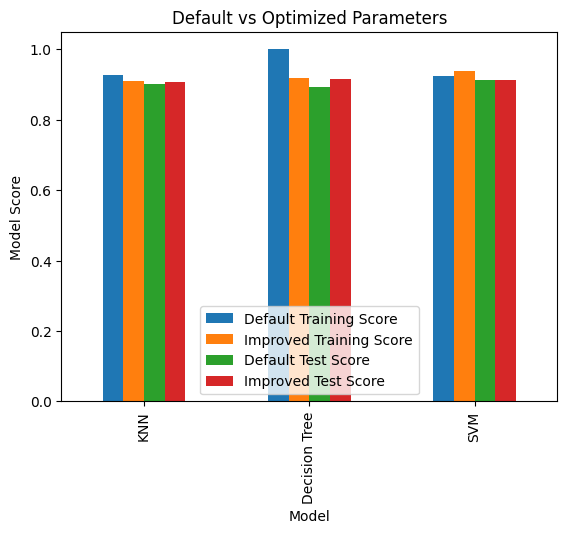

In [53]:
improved_results_dict = {
    'Model': ['KNN', 'Decision Tree', 'SVM'],
    'Default Fit Time': [knn_elapsed_time, decTree_elapsed_time, svc_elapsed_time],
    'Improved Fit Time': [knn_elapsed_time2, decTree_elapsed_time2, svc_elapsed_time2],
    'Time Delta': [knn_elapsed_time2-knn_elapsed_time, decTree_elapsed_time2-decTree_elapsed_time, svc_elapsed_time2-svc_elapsed_time],
    'Default Training Score': [knn_train_score, decTree_train_score, svc_train_score],
    'Improved Training Score': [knn_train_score2, decTree_train_score2, svc_train_score2],
    'Training Score Delta': [knn_train_score2-knn_train_score, decTree_train_score2-decTree_train_score, svc_train_score2-svc_train_score],
    'Default Test Score': [knn_test_score, decTree_test_score, svc_test_score],
    'Improved Test Score': [knn_test_score2, decTree_test_score2, svc_test_score2],
    'Test Score Delta': [knn_test_score2-knn_test_score, decTree_test_score2-decTree_test_score, svc_test_score2-svc_test_score]
}
print(improved_results_dict)
improved_results_df_grid_search = pd.DataFrame(improved_results_dict).set_index('Model')
print(improved_results_df_grid_search)

improved_results_df_search_for_graphing = pd.DataFrame(improved_results_dict)
improved_results_df_search_for_graphing.plot(x='Model', y=['Default Training Score','Improved Training Score','Default Test Score','Improved Test Score'], kind='bar')
plt.ylabel('Model Score')
plt.title('Default vs Optimized Parameters')

### Default vs Searched Parameters Results Matrix

{'Model': ['KNN', 'Decision Tree', 'SVM'], 'Grid Search Time': [541.0309963226318, 78.20378565788269, 7628.245174646378], 'Randomized Search Time': [494.117830991745, 19.699299097061157, 4307.996659994125], 'Time Delta': [46.91316533088684, 58.50448656082153, 3320.248514652252]}
               Grid Search Time  Randomized Search Time   Time Delta
Model                                                               
KNN                  541.030996              494.117831    46.913165
Decision Tree         78.203786               19.699299    58.504487
SVM                 7628.245175             4307.996660  3320.248515


Text(0.5, 1.0, 'Grid vs Randomized Search Time Comparison')

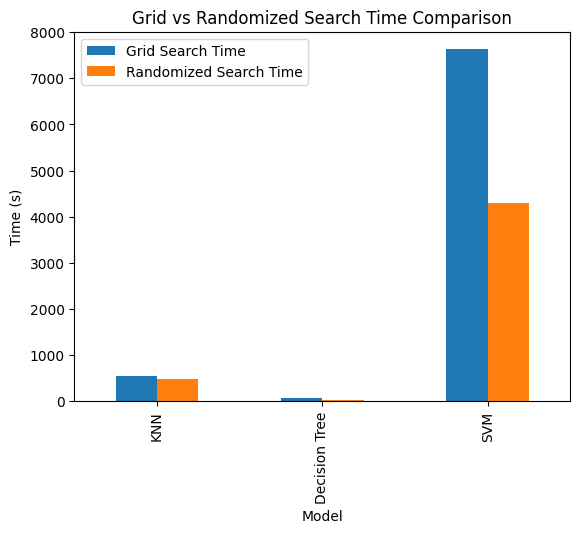

In [49]:
improved_results_dict_search = {
    'Model': ['KNN', 'Decision Tree', 'SVM'],
    'Grid Search Time': [knn_grid_search_elapsed_time, dt_grid_search_elapsed_time, svm_grid_search_elapsed_time],
    'Randomized Search Time': [knn_randomized_search_elapsed_time, dt_randomized_search_elapsed_time, svm_ramdomized_search_elapsed_time],
    'Time Delta': [knn_grid_search_elapsed_time-knn_randomized_search_elapsed_time, dt_grid_search_elapsed_time-dt_randomized_search_elapsed_time, svm_grid_search_elapsed_time-svm_ramdomized_search_elapsed_time],
}

print(improved_results_dict_search)
improved_results_df_search = pd.DataFrame(improved_results_dict_search).set_index('Model')
print(improved_results_df_search)

improved_results_df_search_for_graphing = pd.DataFrame(improved_results_dict_search)
improved_results_df_search_for_graphing.plot(x='Model', y=['Grid Search Time','Randomized Search Time'], kind='bar')
plt.ylabel('Time (s)')
plt.title('Grid vs Randomized Search Time Comparison')

##### Questions